In [259]:
# Importing all libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [260]:
#Reading data from remote link
url ='http://bit.ly/w-data'

df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [261]:
# Shape of the dataset
df.shape

(25, 2)

In [262]:
# Descriptive statistic summary
df.describe()



,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [263]:
# Checking the null values, data-types etc. of the column i.e concise summary of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [264]:
type(X)


numpy.ndarray

In [265]:
type(y)

numpy.ndarray

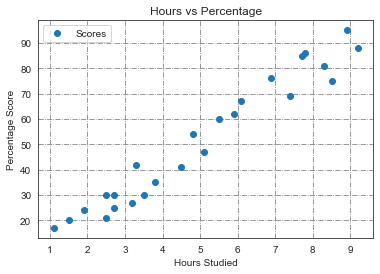

In [266]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend(['Scores'], loc = 'best')
plt.grid(True, color = 'gray', linestyle = "-.")
plt.show()

In [267]:
#Heat map
corr_df = df.corr()
corr_df

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


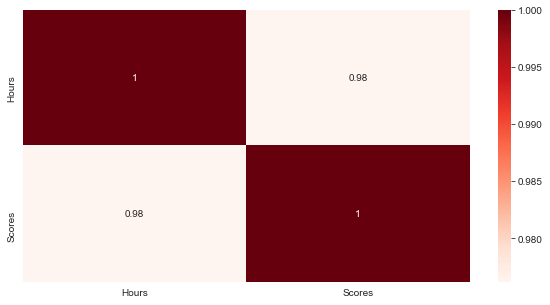

In [268]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df, cmap='Reds',annot=True)

In [269]:
#Preparing the data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR


In [271]:
#Splitting our data into training and testing sets

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [272]:
print("Test Set")
print(X_test.shape)
print(y_test.shape)

Test Set
(5, 1)
(5,)


In [273]:
print("Training Set")
print(X_train.shape)
print(y_train.shape)

Training Set
(20, 1)
(20,)


In [274]:
#Training the model

lr = LR(normalize=True)

lr.fit(X_train,y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

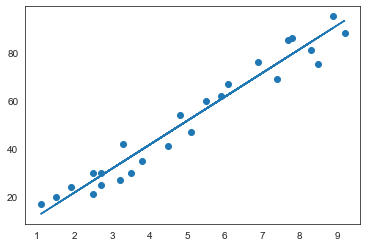

In [275]:
#Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [276]:
#Making Predictions
print(X_test)               # Testing data 
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [277]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [278]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [279]:
from sklearn.metrics import mean_absolute_error,mean_squared_error ,r2_score 

In [280]:
hours = 9.25
req_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(req_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [281]:
train_predict = lr.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 0.949084259502248


In [282]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(X_test)
k1 = mean_absolute_error(test_predict, y_test)
k2 = mean_squared_error(test_predict, y_test)
k3 = r2_score (test_predict, y_test)
print('Test Mean Absolute Error', k1 )
print('Test Mean Squared Error', k2 )
print('R2-Squared', k3)

Test Mean Absolute Error 4.183859899002975
Test Mean Squared Error 21.5987693072174
R2-Squared 0.9546785947197246


In [284]:
 print('Made by Madhav Sharma')


Made by Madhav Sharma
